# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4b : Association rule mining (Market Basket Analysis) </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Jananii Ramesh
- SRN: PES2UG22CS906
- Section: A

Assume that you travel to another parallel universe, where your alter-ego owns a side-hustle retail store. You decide to take up an exercise on association rule mining to improve your skills and extract some essential information to help your alter-ego grow their business.

Given is a dataset that contains some information regarding the transactions at the hypothetical "store".



### About the Dataset:

- BillNo - Identifier for the transaction

- Itemname - Name of the product

- Quantity - Product quantity

- Date - Date and time of the transaction

- Price - Price per item (assumed in Pound Sterling) 

- CustomerID - Identifier for the customer

- Country


For those solving with R, Use the **'arules'** and **'arulesViz'** package wherever necessary.

For those solving with Python, use the **'mlxtend'** or **'apyori'** or any other suitable package wherever necessary

## Install the required packages

In [2]:
install.packages(readxl)

install.packages("arules")

install.packages("arulesViz")

ERROR: Error in eval(expr, envir, enclos): object 'readxl' not found


## Load the required packages

In [3]:
library(readxl)

library(dplyr)

library(arules)

library(arulesViz)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




## Load the dataset and create dataframe

In [4]:
# Your code here
df <- read_excel("/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx")

# View the first few rows of the dataframe
head(df)

Warning message:
“Expecting numeric in A288774 / R288774C1: got 'A563185'”
Warning message:
“Expecting numeric in A288775 / R288775C1: got 'A563186'”
Warning message:
“Expecting numeric in A288776 / R288776C1: got 'A563187'”


BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


## Dataset preparation

Perform data cleaning, Transform the representation as suitable for this problem

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove duplicate entries
- Check which columns contain information that is necessary for this exercise
- Remove rows with NA values in these columns.

### (1 point)

     BillNo         Itemname            Quantity       
 Min.   :536365   Length:522064      Min.   :-9600.00  
 1st Qu.:547892   Class :character   1st Qu.:    1.00  
 Median :560603   Mode  :character   Median :    3.00  
 Mean   :559951                      Mean   :   10.09  
 3rd Qu.:571892                      3rd Qu.:   10.00  
 Max.   :581587                      Max.   :80995.00  
 NA's   :3                                             
      Date                            Price              CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.060   Min.   :12346   
 1st Qu.:2011-03-28 10:15:00.00   1st Qu.:     1.250   1st Qu.:13950   
 Median :2011-07-20 08:59:00.00   Median :     2.080   Median :15265   
 Mean   :2011-07-04 12:51:20.77   Mean   :     3.827   Mean   :15317   
 3rd Qu.:2011-10-19 14:12:00.00   3rd Qu.:     4.130   3rd Qu.:16837   
 Max.   :2011-12-09 12:50:00.00   Max.   : 13541.330   Max.   :18287   
                                                

     BillNo         Itemname        
 Min.   :536365   Length:515320     
 1st Qu.:547891   Class :character  
 Median :560590   Mode  :character  
 Mean   :559941                     
 3rd Qu.:571846                     
 Max.   :581587                     

$`536365`
[1] "WHITE HANGING HEART T-LIGHT HOLDER"  "WHITE METAL LANTERN"                
[3] "CREAM CUPID HEARTS COAT HANGER"      "KNITTED UNION FLAG HOT WATER BOTTLE"
[5] "RED WOOLLY HOTTIE WHITE HEART."      "SET 7 BABUSHKA NESTING BOXES"       
[7] "GLASS STAR FROSTED T-LIGHT HOLDER"  

$`536366`
[1] "HAND WARMER UNION JACK"    "HAND WARMER RED POLKA DOT"

$`536367`
 [1] "ASSORTED COLOUR BIRD ORNAMENT"      "POPPY'S PLAYHOUSE BEDROOM"         
 [3] "POPPY'S PLAYHOUSE KITCHEN"          "FELTCRAFT PRINCESS CHARLOTTE DOLL" 
 [5] "IVORY KNITTED MUG COSY"             "BOX OF 6 ASSORTED COLOUR TEASPOONS"
 [7] "BOX OF VINTAGE JIGSAW BLOCKS"       "BOX OF VINTAGE ALPHABET BLOCKS"    
 [9] "HOME BUILDING BLOCK WORD"           "LOVE BUILDING BLOCK WORD"          
[11] "RECIPE BOX WITH METAL HEART"        "DOORMAT NEW ENGLAND"               

$`536368`
[1] "JAM MAKING SET WITH JARS"       "RED COAT RACK PARIS FASHION"   
[3] "YELLOW COAT RACK PARIS FASHION" "BLUE COAT RACK PARIS FASHION"  

$`536369`
[1] "BATH BUILDING BLOCK WORD"

$`536370`
 [1] "ALARM CLOCK BAKELIKE PINK"          "ALARM CLOCK BAKELIKE RED"          
 [3] "ALARM CLOCK BAKELIKE GREEN"         "PANDA AND BUNNIES STICKER SHEET"   
 [5] "STARS GIFT TAPE"                    "INFLATABLE POLITICAL GLOBE"        
 [7] "VINTAGE HEADS AND TAILS CARD GAME"  "SET/2 RED RETROSPOT TEA TOWELS"    
 [9] "ROUND SNACK BOXES SET OF4 WOODLAND" "SPACEBOY LUNCH BOX"                
[11] "LUNCH BOX I LOVE LONDON"            "CIRCUS PARADE LUNCH BOX"           
[13] "CHARLOTTE BAG DOLLY GIRL DESIGN"    "RED TOADSTOOL LED NIGHT LIGHT"     
[15] "SET 2 TEA TOWELS I LOVE LONDON"     "VINTAGE SEASIDE JIGSAW PUZZLES"    
[17] "MINI JIGSAW CIRCUS PARADE"          "MINI JIGSAW SPACEBOY"              
[19] "MINI PAINT SET VINTAGE"             "POSTAGE"

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions as itemMatrix in sparse format with
 20205 rows (elements/itemsets/transactions) and
 4184 columns (items) and a density of 0.006030704 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER            JUMBO BAG RED RETROSPOT 
                              2202                               2064 
          REGENCY CAKESTAND 3 TIER                      PARTY BUNTING 
                              1904                               1656 
           LUNCH BAG RED RETROSPOT                            (Other) 
                              1541                             500455 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2236  831  678  648  675  609  602  599  603  529  543  487  497  524  535  545 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 456  433  475  422  393  341  343  303  244  254  236  237  262  218  189  183 
  33   34   35   36 

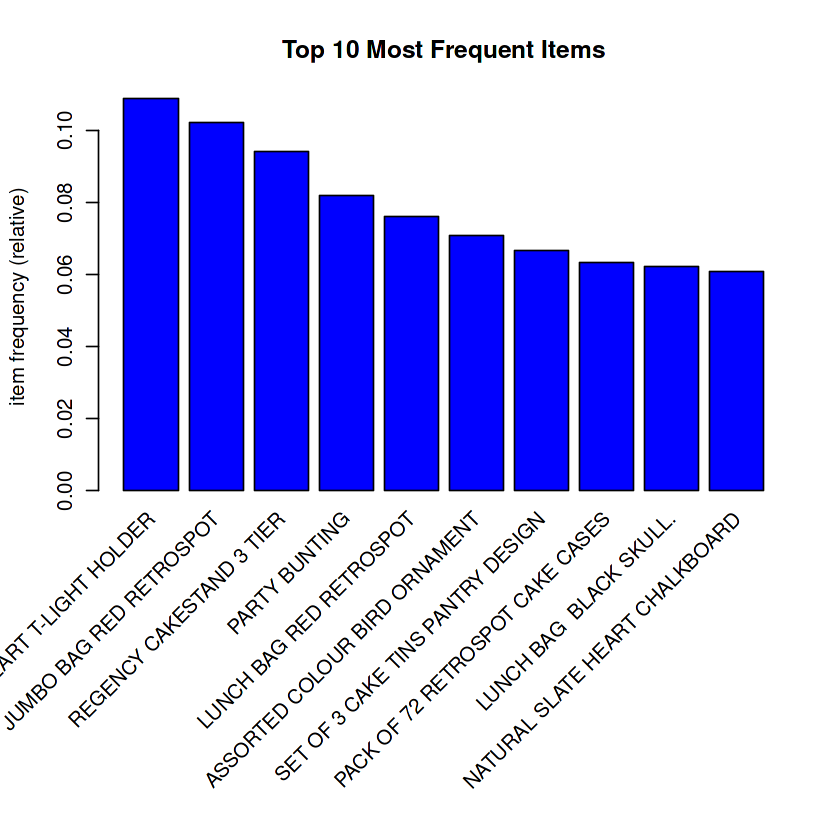

In [5]:

# Your code here
# Load necessary packages
library(dplyr)

# Step 1: Load the dataset
# Assuming `df` is your original dataframe
summary(df)  # Check the summary of the dataset

# Step 2: Remove duplicate rows if necessary
df_cleaned <- df %>% distinct()

# Step 3: Check which columns contain necessary information
# You need columns such as transaction ID (e.g., BillNo) and item name (e.g., Itemname)
df_cleaned <- df_cleaned %>%
  select(BillNo, Itemname) %>%  # Choose the relevant columns
  na.omit()  # Remove rows with NA values in these columns

# Step 4: Check the cleaned data
summary(df_cleaned)





# Convert the dataframe into a list of transactions
# We assume that `df_cleaned$BillNo` is the transaction ID and `df_cleaned$Itemname` is the item name

transaction_list <- split(df_cleaned$Itemname, df_cleaned$BillNo)

# Check the first few transactions
head(transaction_list)


# Convert the list into a transactions object
# Load the arules package
library(arules)

# Convert the list into a transactions object
trans <- as(transaction_list, "transactions")

# Inspect the transaction data
summary(trans)





# Create an item frequency plot
# Plot the item frequencies
itemFrequencyPlot(trans, topN = 10, col = "blue", main = "Top 10 Most Frequent Items")



# Your code here

## Problem 1

1. What are the 10 most popular itemsets, given Minimum Support Count = 0.02? Display the itemsets, frequency and support.

2. Find Confidence and Lift of the association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}".

3. Based on the value of Lift, what do you infer regarding the given association rule?


### 3 points (1+1+1)

In [6]:
# Your code here
#  Apply the Apriori algorithm with a minimum support of 0.02
frequent_itemsets <- apriori(trans, parameter = list(support = 0.02, target = "frequent itemsets"))

# View the top 10 most popular itemsets
inspect(head(sort(frequent_itemsets, by = "support"), 10))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 404 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4184 item(s), 20205 transaction(s)] done [0.21s].
sorting and recoding items ... [280 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
sorting transactions ... done [0.00s].
writing ... [358 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     items                                support    count
[1]  {WHITE HANGING HEART T-LIGHT HOLDER} 0.10898293 2202 
[2]  {JUMBO BAG RED RETROSPOT}            0.10215293 2064 
[3]  {REGENCY CAKESTAND 3 TIER}           0.094

In [ ]:
# The high lift values (17.03 and 18.72) indicate a strong association between the teacups, suggesting they are often bought together and likely viewed as part of a matching product line. These items are complementary, which makes them ideal for recommendations—customers buying one teacup (e.g., PINK REGENCY) are likely interested in others (e.g., GREEN REGENCY). Thus, these items should be marketed together to maximize sales through cross-promotions.

## Problem 2

1. What are the top-5 itemsets that you would recommend for cross-selling?

Hint: Association rules. List the antecedents, consequents, support, confidence and lift.


2. Recount a personal experience where you have come across cross-selling or up-selling in any of your purchases (be it online, at restaurants or some other place). Was it useful to you? Did you accept or decline the offer?



### 2 points (1+1)

In [7]:
# Your code here
#  Define the association rule
rule <- apriori(trans, parameter = list(support = 0.02, confidence = 0.01, target = "rules"))

#  Extract the specific rule for PINK REGENCY TEACUP AND SAUCER => GREEN REGENCY TEACUP AND SAUCER
specific_rule <- subset(rule, lhs %in% "PINK REGENCY TEACUP AND SAUCER" & rhs %in% "GREEN REGENCY TEACUP AND SAUCER")

#  Inspect the rule for confidence and lift
inspect(specific_rule)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 404 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4184 item(s), 20205 transaction(s)] done [0.20s].
sorting and recoding items ... [280 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [438 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                  rhs                                  support confidence   coverage     lift count
[1] {PINK REGENCY TEACUP AND SAUCER}  => {GREEN REGENCY TEACUP AND SAUCER} 0.02994308  0.8220109 0.03642663 17.03459   605
[2] {PINK REGENCY TEACUP AND SAUCER,  

In [ ]:
# ### Personal Experience with Cross-Selling

# While buying a **laptop** online, I was cross-sold a **laptop sleeve** and **wireless mouse** with a suggestion to “Complete your setup!” These were complementary items I hadn’t initially considered but found valuable for protecting the laptop and enhancing usability.

# - **Usefulness:** Yes, the suggestions were relevant, addressing practical needs.
# - **Outcome:** I accepted and purchased both, improving my overall setup.

# ### Key Takeaways:
# - **Effective Cross-Selling:** Relevant recommendations add value and meet customer needs.
# - **Up-Selling Comparison:** While cross-selling adds complementary items, up-selling involves suggesting higher-value alternatives, which wasn’t applicable here.

# ### Conclusion:
# This cross-selling approach improved my shopping experience by suggesting items that complemented my main purchase, enhancing satisfaction.

## Problem 3

Find out a new set of association rules with minimum support=0.025 and minimum confidence = 0.7.

1. Plot a graph of the first 5 association rules (sorted by confidence). 
What are the 3 most important rules on this graph?
2. For R, Plot a Grouped Matrix using these rules, with k = 20. ('k' is the number of groups of itemsets that will be plotted. State 2 points of observations from the plot.
3. For Python, Visualize a scatter plot of the support against confidence (label the corresponding rule). State 2 points of observations from the plot.

For those using the *'arulesViz'* package. You can refer the necessary sections in the documentation of the package for a better understanding on how to interpret the graphs.grphs.



### 4 points (2+2)

In [8]:
# Your code here
# Assuming 'trans' is the transaction object
library(arules)
library(arulesViz)

# Apply the apriori algorithm with minimum support=0.025 and minimum confidence=0.7
rules <- apriori(trans, parameter = list(support = 0.025, confidence = 0.7, target = "rules"))

# Sort the rules by confidence in descending order
rules_sorted_by_confidence <- sort(rules, by = "confidence", decreasing = TRUE)

# Get the top 5 rules
top_5_rules <- head(rules_sorted_by_confidence, 5)

# Inspect the top 5 rules
inspect(top_5_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.025      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 505 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4184 item(s), 20205 transaction(s)] done [0.20s].
sorting and recoding items ... [178 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                   rhs                                  support confidence   coverage     lift count
[1] {PINK REGENCY TEACUP AND SAUCER,                                                                                       
     ROSES REGENCY TEACUP AND SAUCER} 

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


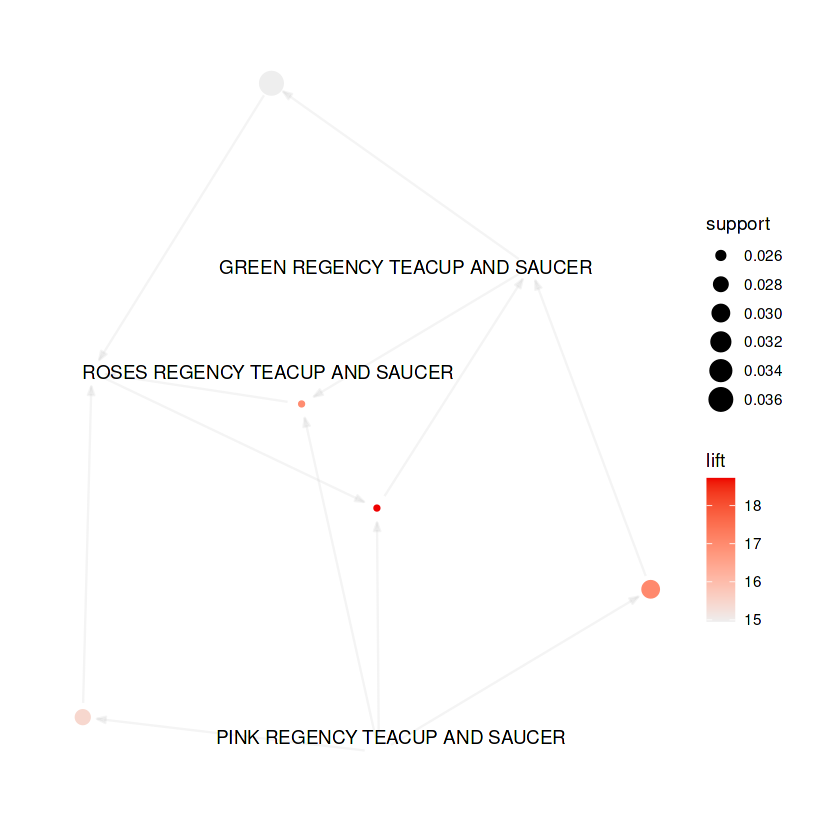

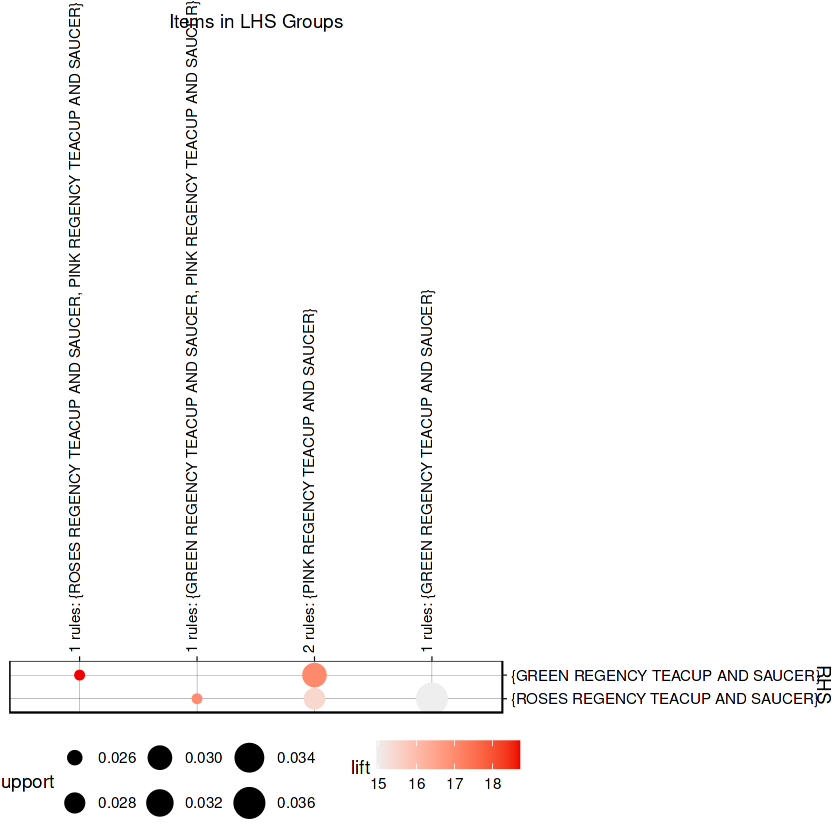

In [9]:
# Plot the top 5 rules as a graph
plot(top_5_rules, method = "graph", control = list(type = "items"))
# Plot a grouped matrix using the top 5 rules
plot(top_5_rules, method = "grouped", control = list(k = 20))

------

With this, we draw a close to our multiverse adventure and head back to our original world.



Hope this exercise helped you learn something new and hone your skills as a Data Analyst!



Until next time :)